In [1]:
import pandas as pd

In [2]:
import os

In [3]:
os.getcwd()

'/Users/brandonkenney/Desktop/Python Course'

In [2]:
movies = pd.read_csv("P4-Movie-Ratings.csv")

In [12]:
movies

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
...,...,...,...,...,...,...
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009


In [3]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']

In [13]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [24]:
movies.Film = movies.Film.astype('category')

In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    object  
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    int64   
dtypes: category(1), int64(4), object(1)
memory usage: 43.6+ KB


In [23]:
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [13]:
movies.Year.cat.categories

Int64Index([2007, 2008, 2009, 2010, 2011], dtype='int64')

In [14]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

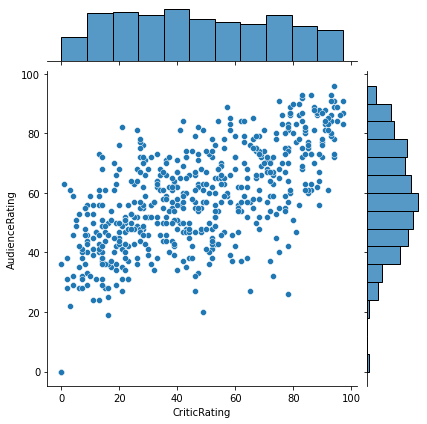

In [16]:
jointplot = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating')

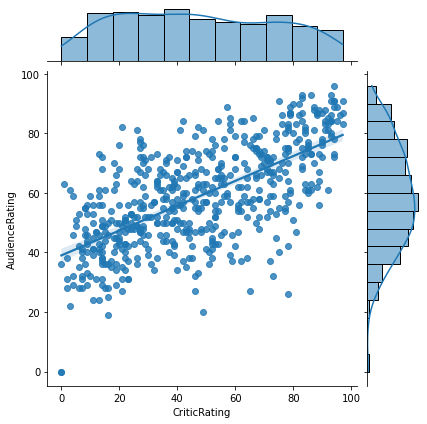

In [17]:
jointplot = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='reg')

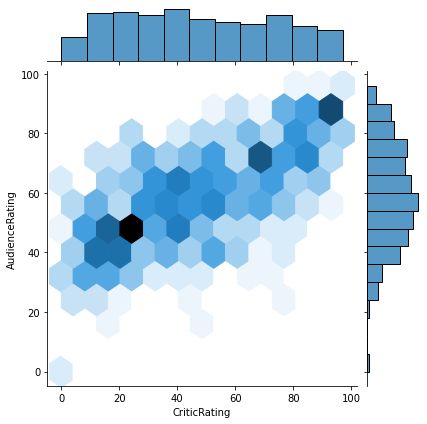

In [21]:
jointplot = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='hex')

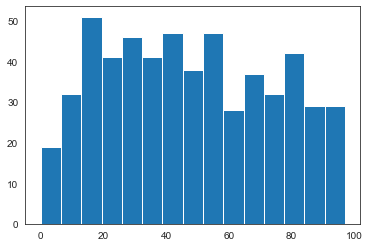

In [24]:
sns.set_style('white')
plot = plt.hist(movies.CriticRating, bins=15)

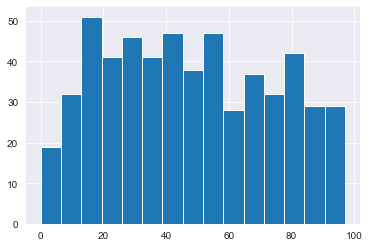

In [25]:
sns.set_style('darkgrid')
plot = plt.hist(movies.CriticRating, bins=15)

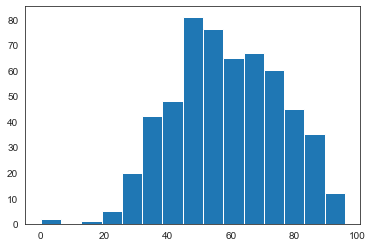

In [26]:
sns.set_style('white')
plot = plt.hist(movies.AudienceRating, bins=15)

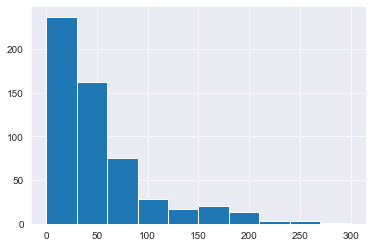

In [24]:
sns.set_style('darkgrid')
h1 = plt.hist(movies.BudgetMillions)


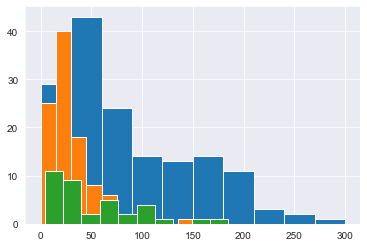

In [13]:
plt.hist(movies[movies.Genre == "Action"].BudgetMillions)
plt.hist(movies[movies.Genre == "Drama"].BudgetMillions)
plt.hist(movies[movies.Genre == "Thriller"].BudgetMillions)
plt.show()

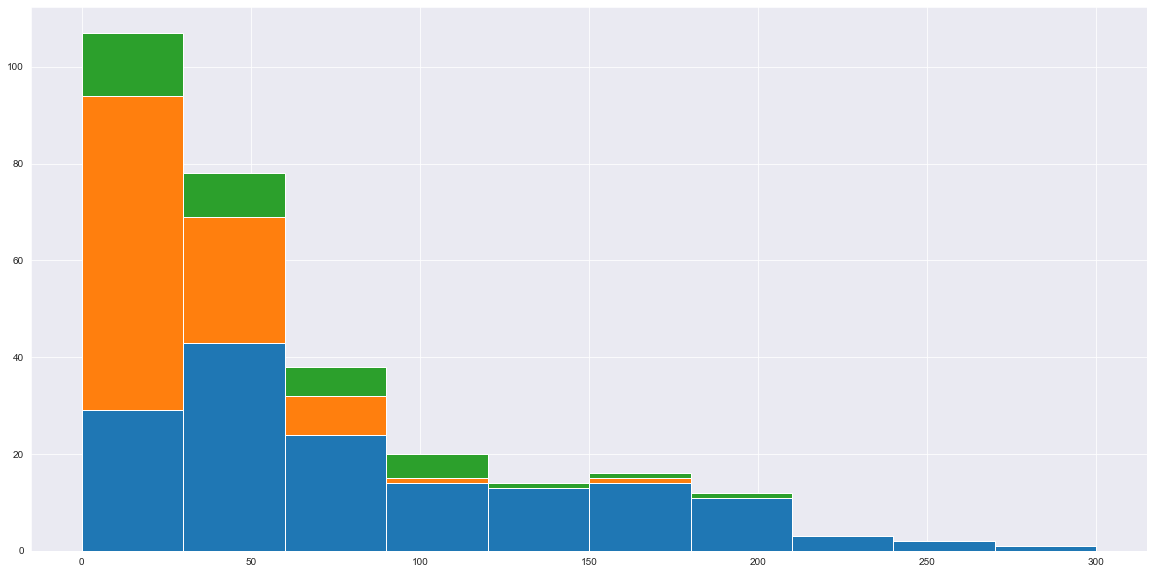

In [36]:
plt.hist([movies[movies.Genre == "Action"].BudgetMillions,movies[movies.Genre == "Drama"].BudgetMillions,movies[movies.Genre == "Thriller"].BudgetMillions], stacked=True)
plt.show()

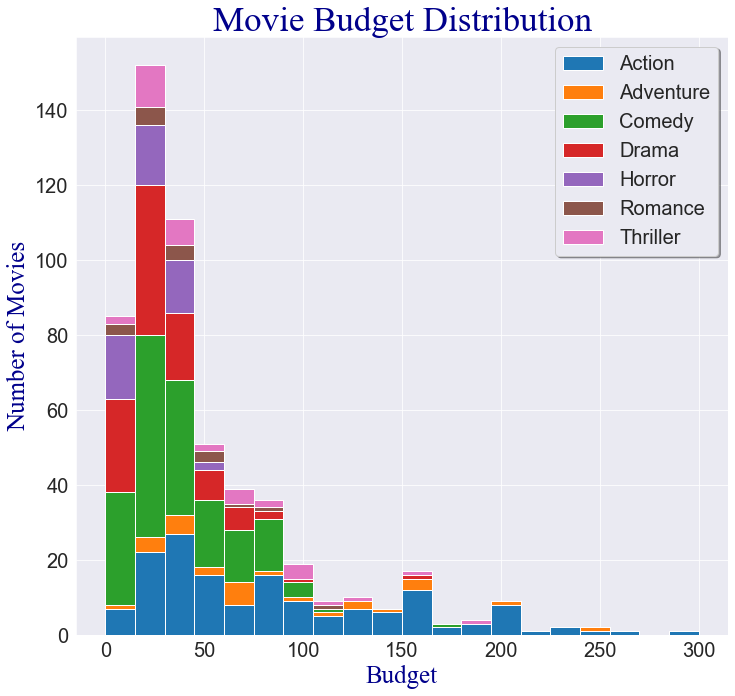

In [77]:
list1 = list()
mylabels = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)
fig, ax = plt.subplots()    
fig.set_size_inches(11.7,11)
h1 = plt.hist(list1, stacked=True, bins=20, label=mylabels)
plt.title("Movie Budget Distribution", fontsize=35, color="DarkBlue", fontname="Times New Roman")
plt.ylabel("Number of Movies", fontsize=25, color="DarkBlue",fontname="Times New Roman")
plt.xlabel("Budget", fontsize=25, color="DarkBlue",fontname="Times New Roman")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(frameon=True, fontsize=20, shadow=True)


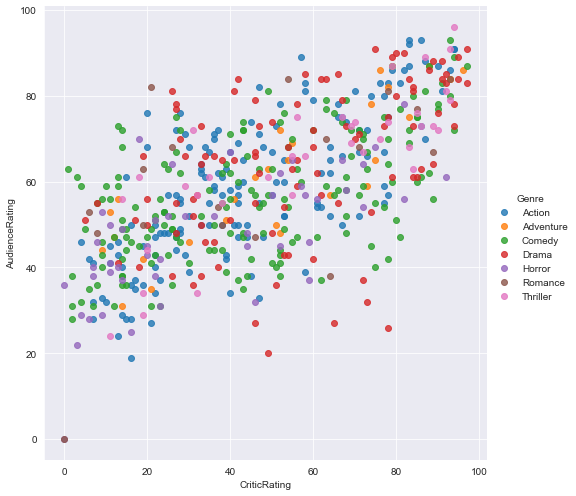

In [75]:
vis20 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating', hue='Genre', fit_reg=False, size=7, aspect=1)
sns.set_style('darkgrid')

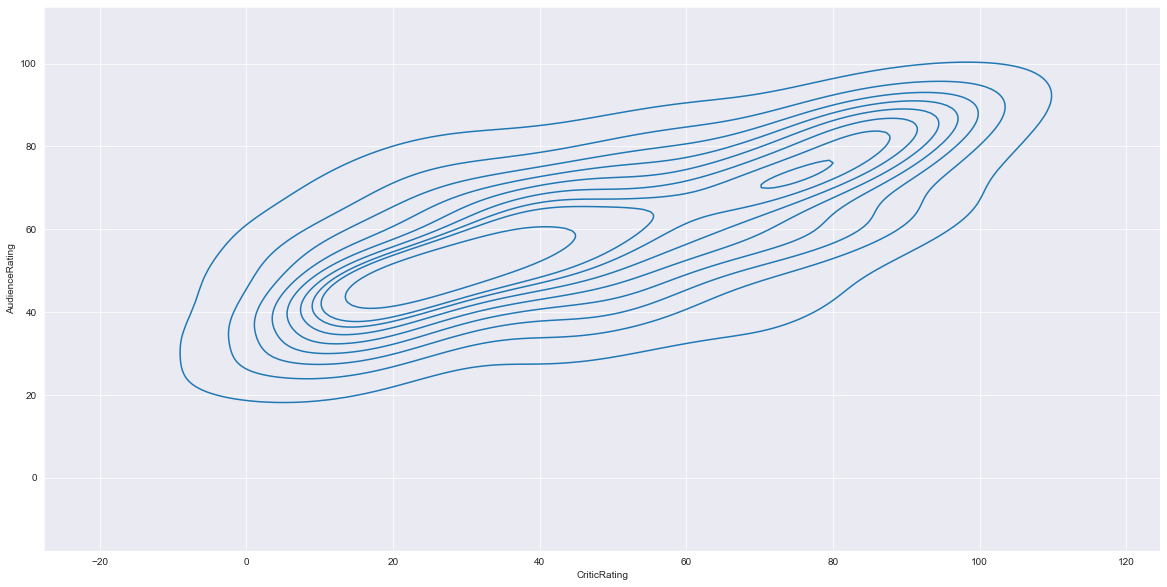

In [30]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating)
plt.rcParams['figure.figsize'] = 15,10

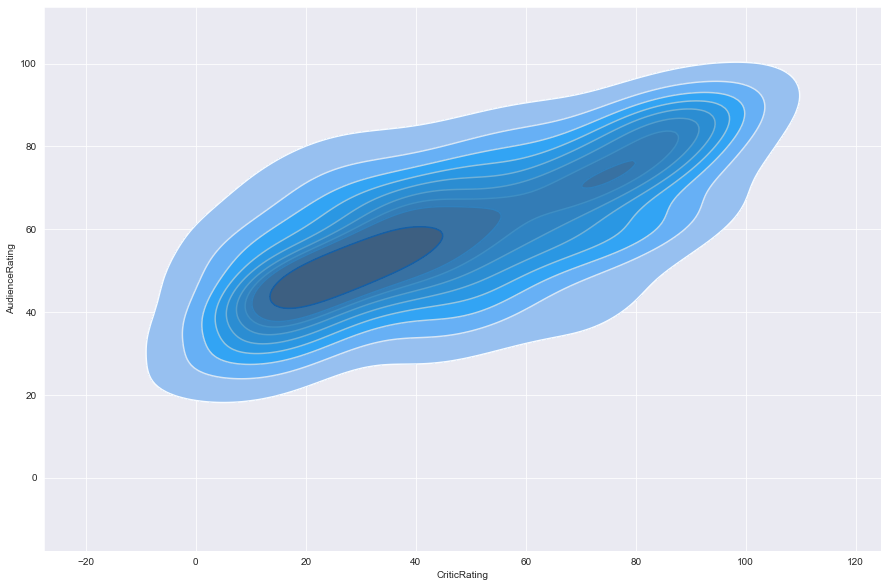

In [27]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False)
k1b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='Blues')
plt.rcParams['figure.figsize'] = 20,10

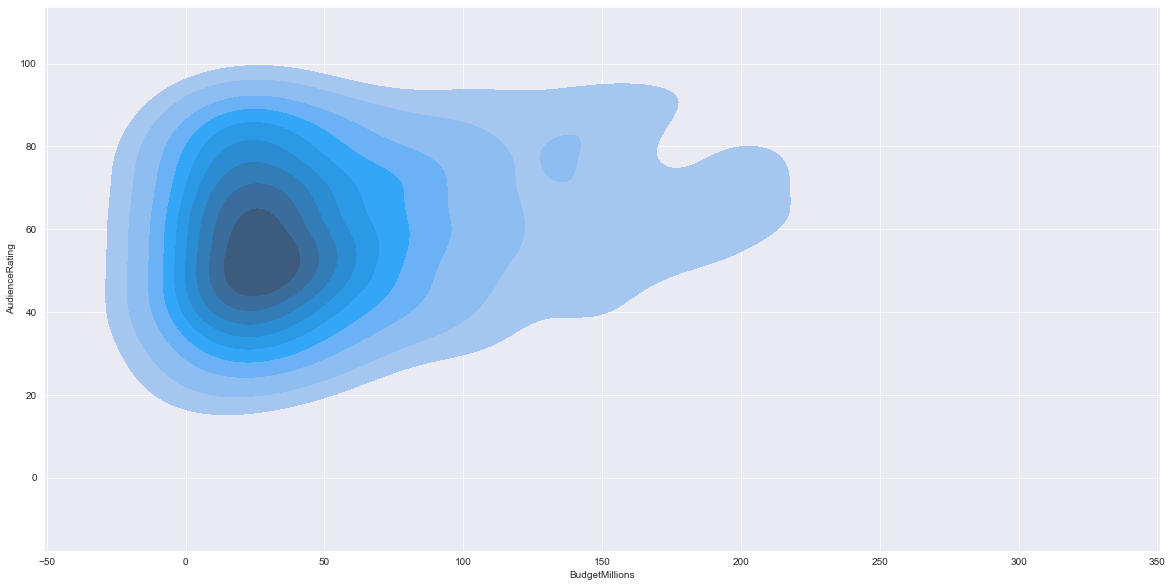

In [18]:
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, shade=True, shade_lowest=False)
plt.rcParams['figure.figsize'] = 20,10
sns.set_style('darkgrid')

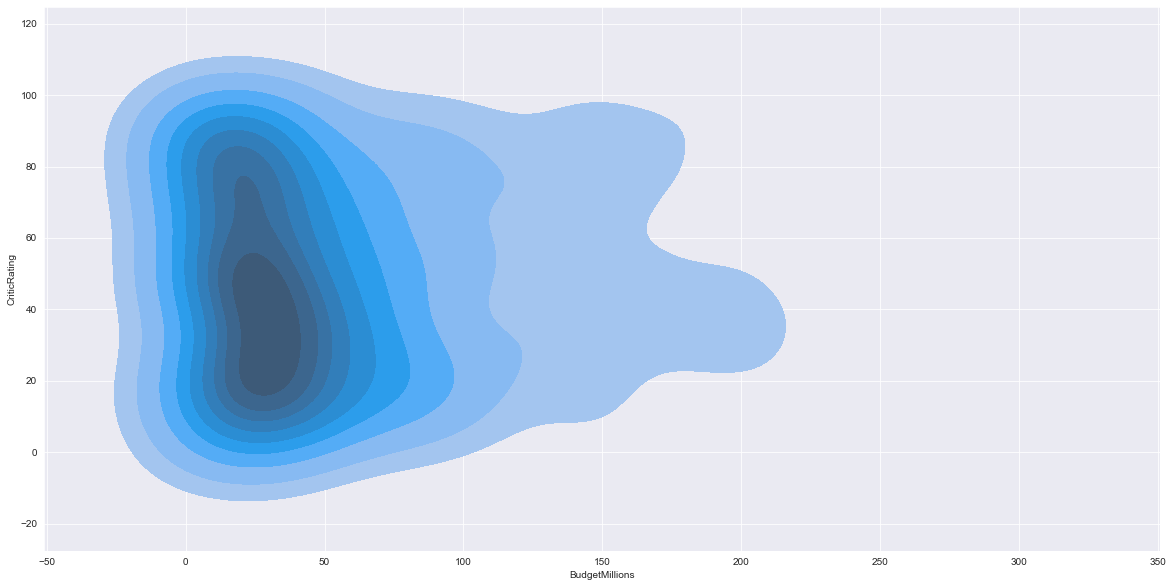

In [19]:
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, shade=True, shade_lowest=False)
plt.rcParams['figure.figsize'] = 20,10
sns.set_style('darkgrid')

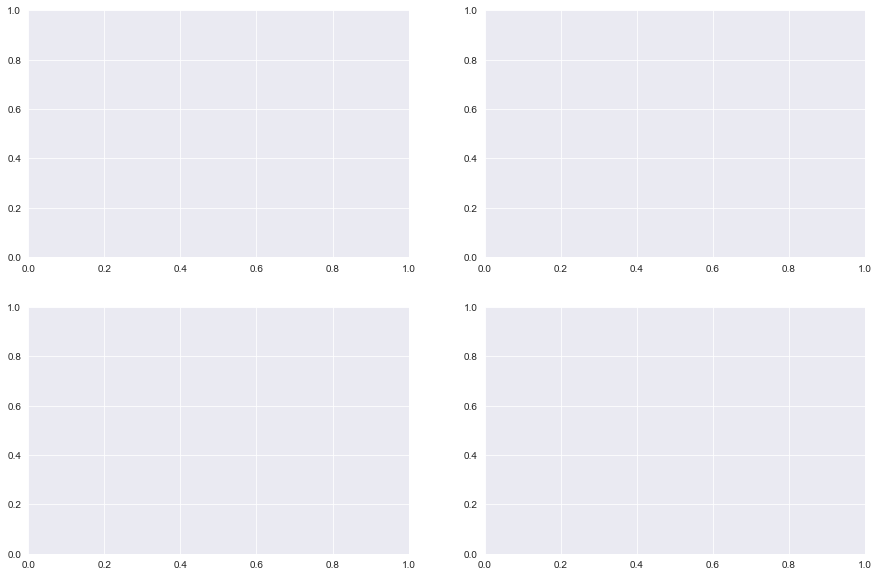

In [15]:
f, ax = plt.subplots(2,2, figsize=(15,10))

[(-50.0, 250.0)]

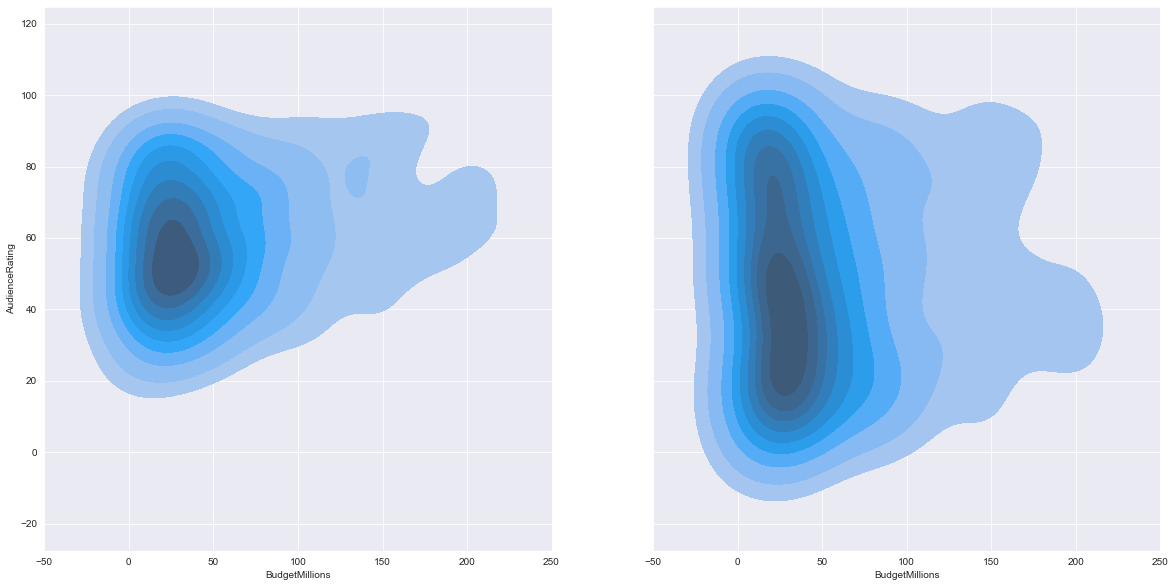

In [30]:
f, ax = plt.subplots(1,2, figsize=(20,10), sharex=True, sharey=True)
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, shade=True, shade_lowest=False, ax=ax[0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, shade=True, shade_lowest=False, ax=ax[1])
k1.set(xlim=(-50,250))

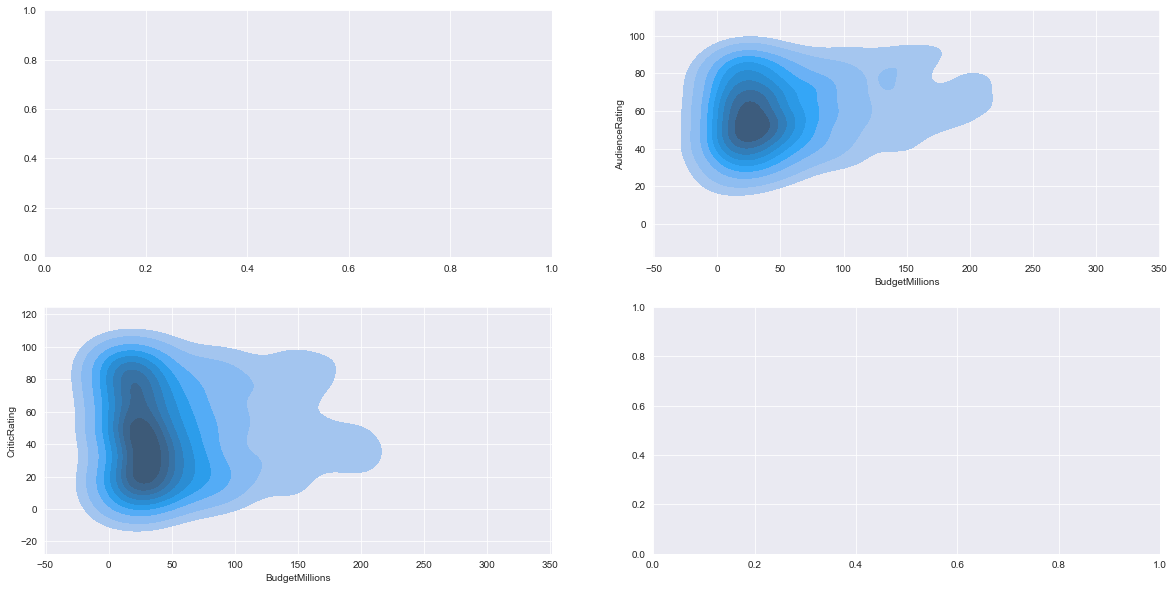

In [25]:
f, ax = plt.subplots(2,2, figsize=(20,10))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, shade=True, shade_lowest=False, ax=ax[0,1])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, shade=True, shade_lowest=False, ax=ax[1,0])

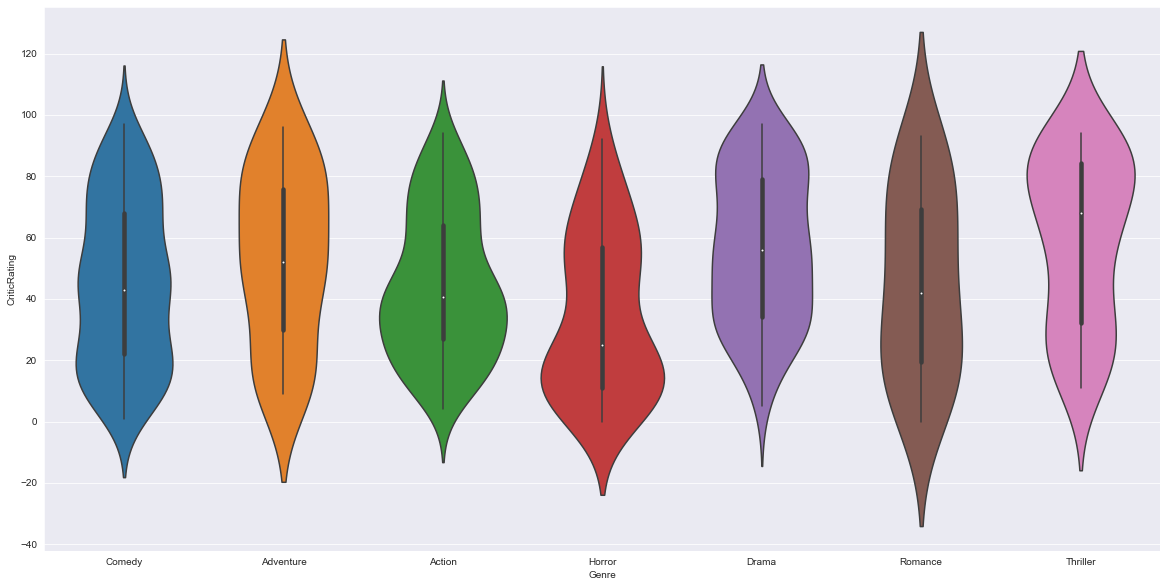

In [32]:
z =sns.violinplot(data=movies, y='CriticRating', x='Genre')

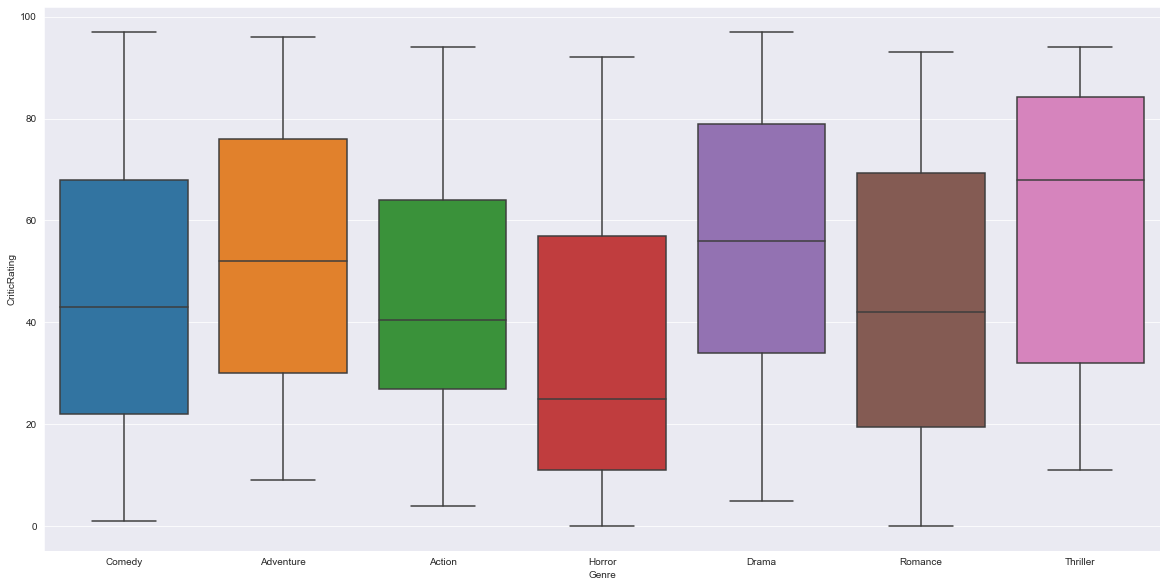

In [33]:
x=sns.boxplot(data=movies, y='CriticRating', x='Genre')

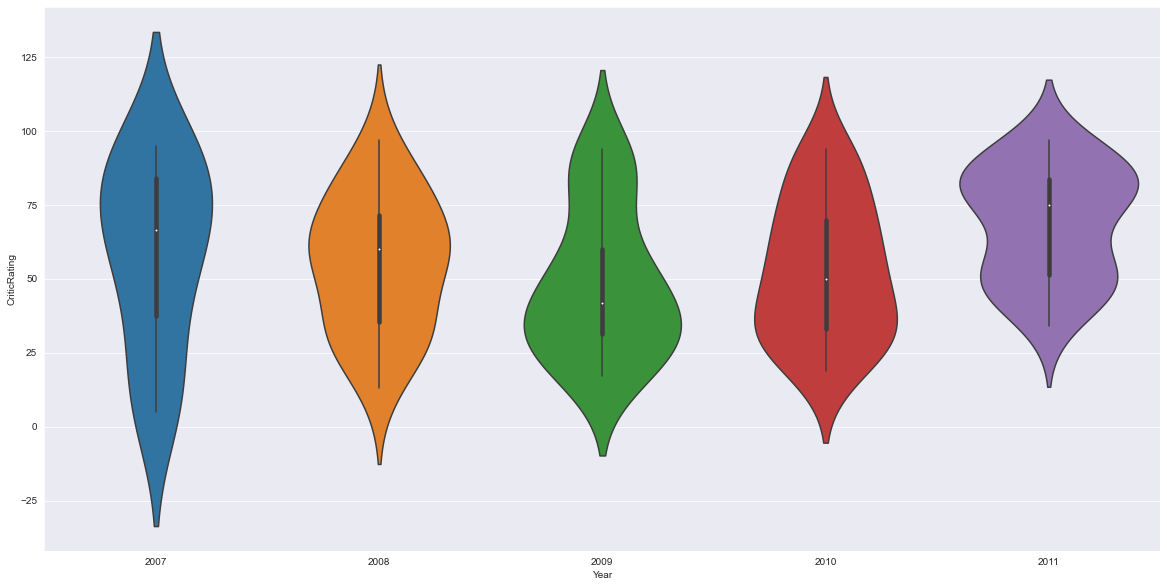

In [34]:
z =sns.violinplot(data=movies[movies.Genre == 'Drama'], y='CriticRating', x='Year')

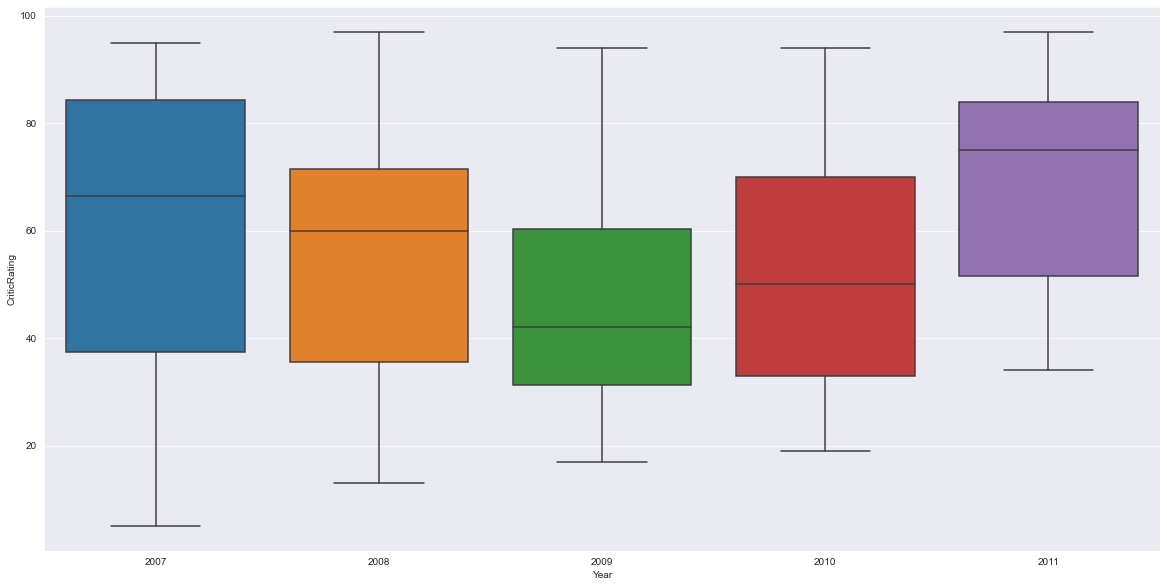

In [35]:
z =sns.boxplot(data=movies[movies.Genre == 'Drama'], y='CriticRating', x='Year')

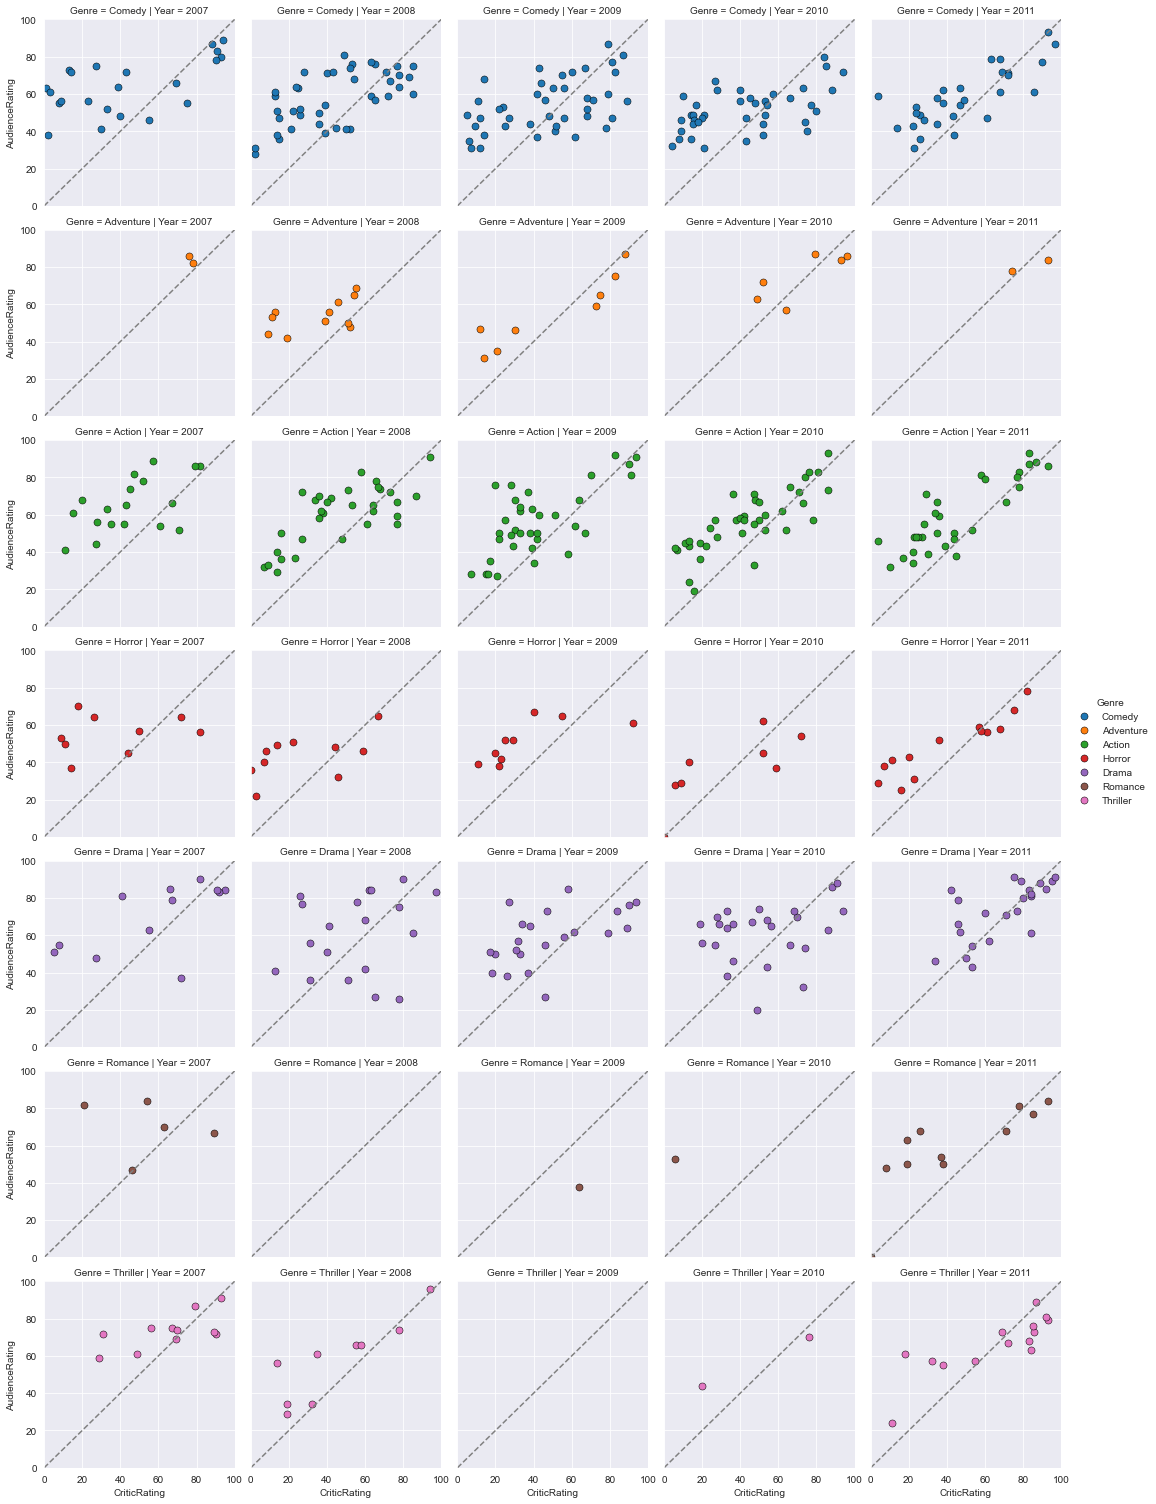

In [29]:
h = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
h = h.map(plt.scatter, 'CriticRating', 'AudienceRating',**kws)
sns.set_style('darkgrid')
kws = dict(s=50, linewidth=.5, edgecolor= 'black')
h.set(xlim=(0,100), ylim=(0,100))
for ax in h.axes.flat:
    ax.plot((0,100), (0,100), c='gray', ls='--')
h.add_legend()

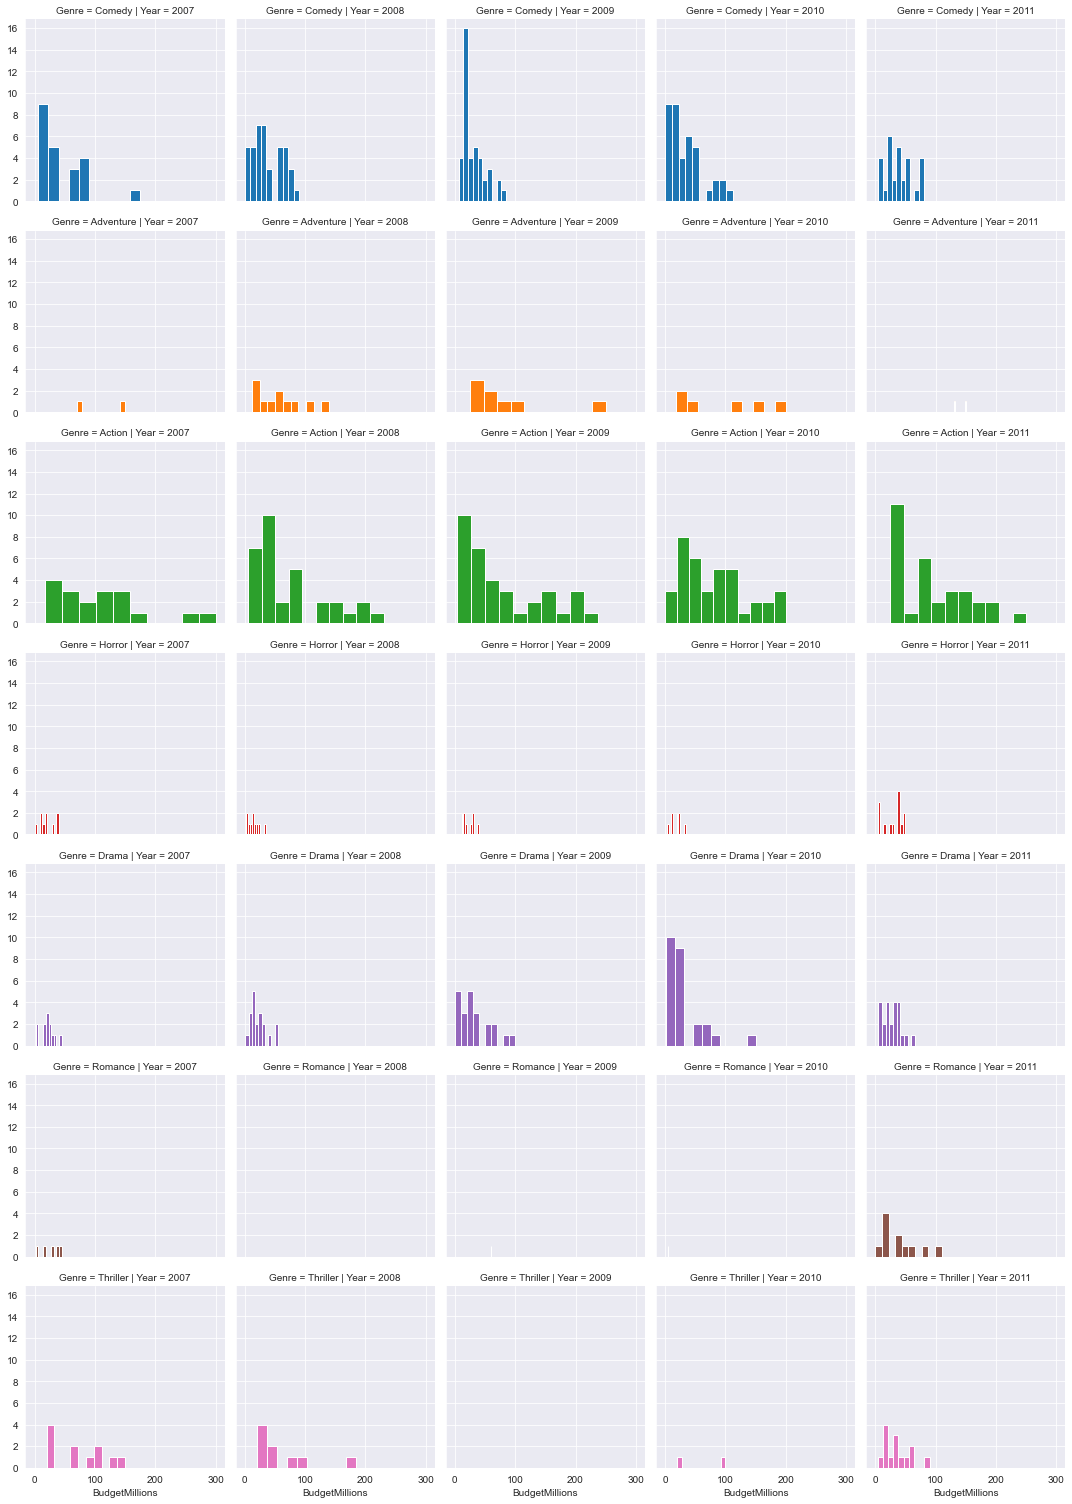

In [23]:
h = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
h = h.map(plt.hist, 'BudgetMillions')
sns.set_style('darkgrid')

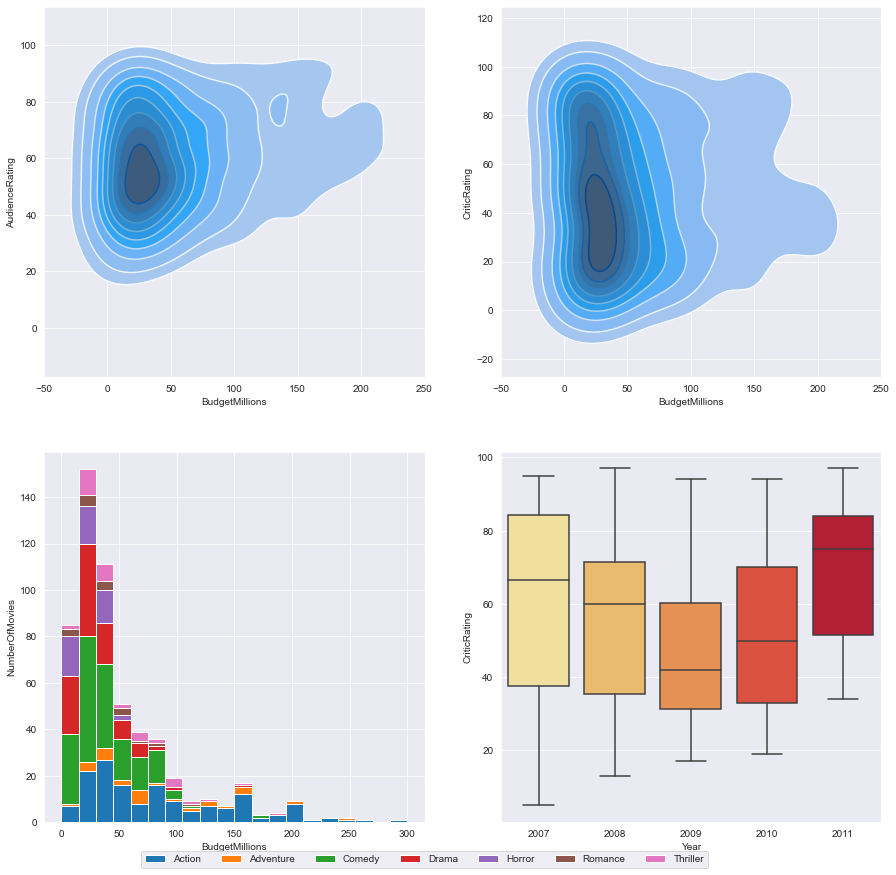

In [71]:
f, ax = plt.subplots(2,2, figsize=(15,15))
sns.set_style('darkgrid')
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, shade=True, shade_lowest=False, ax=ax[0,0])
k1b = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, cmap='Blues', ax=ax[0,0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, shade=True, shade_lowest=False, ax=ax[0,1])
k2b = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, cmap='Blues', ax=ax[0,1])
k1.set(xlim=(-50,250))
k2.set(xlim=(-50,250))
list1 = list()
mylabels = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)
    
ax[1,0].hist(list1, stacked=True, bins=20, label=mylabels)
ax[1,0].legend(mylabels, loc='center', bbox_to_anchor=(1,-0.1), ncol=len(mylabels))
ax[1,0].set_xlabel("BudgetMillions")
ax[1,0].set_ylabel("NumberOfMovies")
z = sns.boxplot(data=movies[movies.Genre == 'Drama'], y='CriticRating', x='Year', ax=ax[1,1], palette='YlOrRd')